# Image Encryption using Chaos Maps (Arnold Map and Henon Map) and Logistic Map

## Shaikh Rumman Fardeen 21BCE1736
## S S Jayakar Raju 21BCE5622


---



<b>What are Chaos Maps?</b>

Chaos maps, also known as chaotic maps or chaotic systems, are a class of nonlinear dynamical systems that exhibit highly complex and seemingly unpredictable behavior despite their deterministic nature and relatively simple mathematical formulations. These systems are characterized by their sensitivity to initial conditions, which means that even infinitesimal changes in the initial state can lead to vastly different outcomes over time.

<br>

<b>Why Chaos Maps for Encryption?</b>

Traditional encryption mechanisms, such as the Advanced Encryption Standard (AES) and the Rivest-Shamir-Adleman (RSA) algorithm, while widely used and secure, can exhibit certain drawbacks and weaknesses when it comes to the encryption of digital images. These drawbacks include:

1. **Large computational time**: The encryption process for large images can be time-consuming, especially when using traditional algorithms that operate on a bit-by-bit or byte-by-byte basis.
2. **High computing power requirements**: Encrypting large images may demand significant computing resources, which can be a limitation for devices with constrained processing capabilities.

Consequently, researchers have explored alternative techniques for image encryption, and chaos-based algorithms have emerged as promising candidates due to their unique properties and potential advantages.

<br>

<b>Advantages of Chaos-based Algorithms for Image Encryption:</b>

Certain chaos-based and other dynamical systems-based algorithms possess several important properties that make them attractive for image encryption:

1. **Sensitive dependence on initial conditions**: Small variations in the initial conditions can lead to vastly different outcomes, providing a high level of unpredictability and making it difficult for an attacker to deduce the original image or the encryption key.
2. **Pseudorandom properties**: The chaotic behavior of these systems can produce sequences that appear random, mimicking the desirable properties of true randomness while still being deterministic.
3. **Ergodicity**: Chaotic systems can explore the entire phase space over time, ensuring a thorough diffusion of the plaintext image across the ciphertext.
4. **Non-periodicity**: Chaotic systems do not exhibit strict periodicity, making it harder to predict or deduce patterns in the ciphertext.

In addition to these properties, chaos-based algorithms often offer advantages such as low computational overhead, high security complexity, and the potential for parallel processing, which can make them suitable for real-time and resource-constrained applications.

It is important to note that while chaos-based algorithms show promise in image encryption, their security and efficacy should be thoroughly evaluated and compared to established encryption standards before deployment in critical applications.

In [1]:
from PIL import Image
import numpy as np
import os
from matpl  otlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'google.colab'

Function to get Image matrix from Pixel Access object

In [ ]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0],color

In [ ]:
def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]

# Arnold Cat Map

Arnold's cat map is a chaotic map often used for pixel manipulation. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.

For this implementation
The transform applied on the image is:
R([x,y]) = [(x + y) mod n, (x + 2y) mod n]
where n is the dimensions of the image

<br>

When the transformation is repeated enough times, the original image will reappear.
The number of iterations 'n' at which the original image will reappear is given by these rules of thumb:
Here 'd' is the dimension of the square image:

1.   if d =  2.(5^i) for i >=1, n = 3*d
2.   if d = (5^i) for i >=1, n = 2*d
3.   if d = 6.(5^i) for i>=1, n = 2*d
4.   else n <= 12*d / 7

This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image.

In [ ]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

# def ArnoldCatTransform(img, num):
#     rows, cols, ch = img.shape
#     img_arnold = np.zeros([rows, cols, ch], dtype=np.uint8)  # Ensure proper data type
#     for x in range(rows):
#         for y in range(cols):
#             new_x = (x + y * num) % rows
#             new_y = (x + 2 * y * num) % cols
#             img_arnold[new_x][new_y] = img[x][y]
#     return img_arnold


Arnold Cat Encryption

In [ ]:
def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img

Arnold Cat Decryption

In [ ]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [ ]:
image = "HorizonZero"
ext = ".png"
key = 20

# image = "SRF"
# ext = ".png"
# key = 20

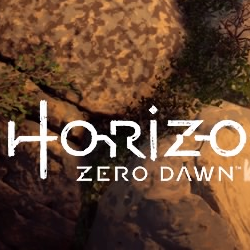

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

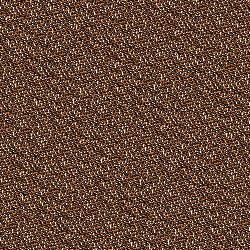

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

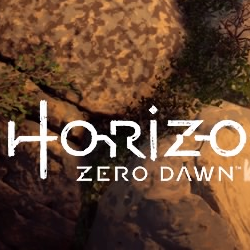

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)


## Histogram Analysis


The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.

### Original Image

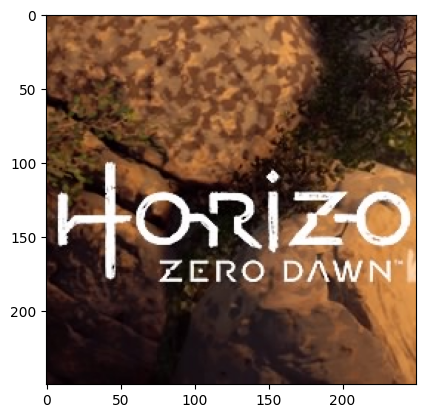

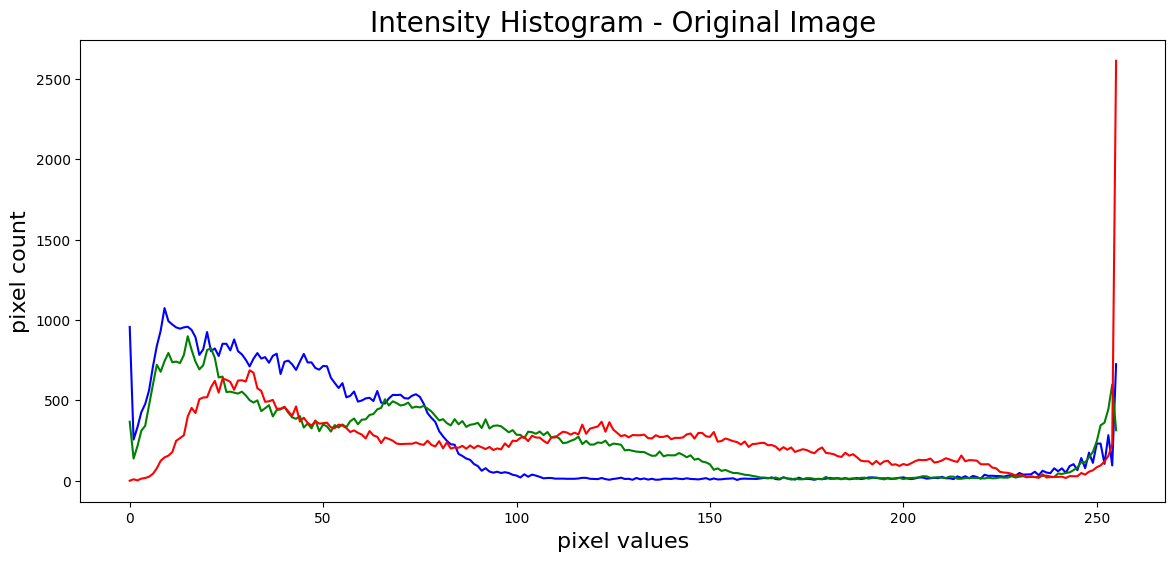

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

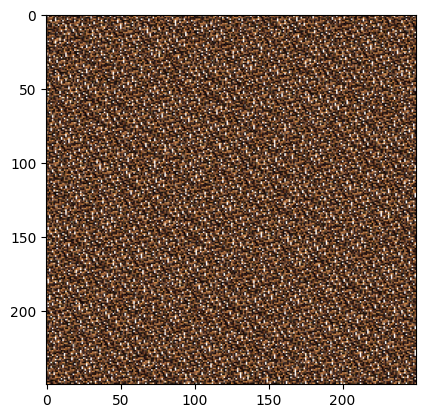

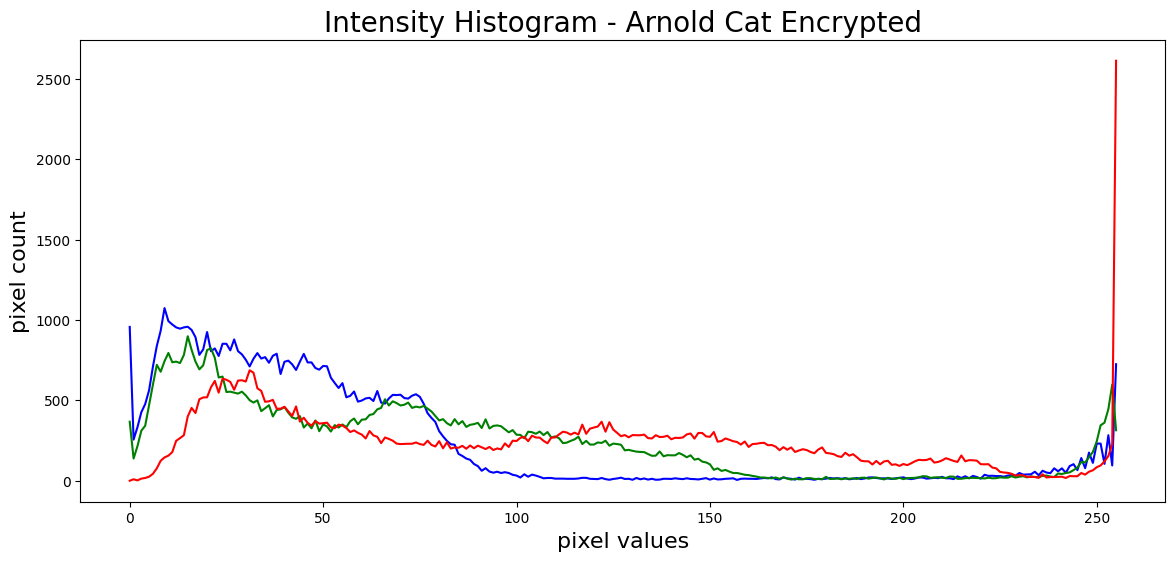

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Arnold Cat Encrypted', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel Auto-Correlation
Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction.

1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern

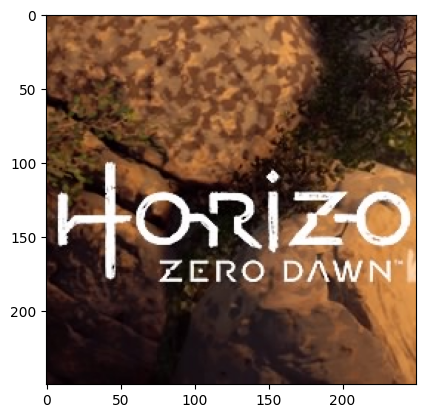

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

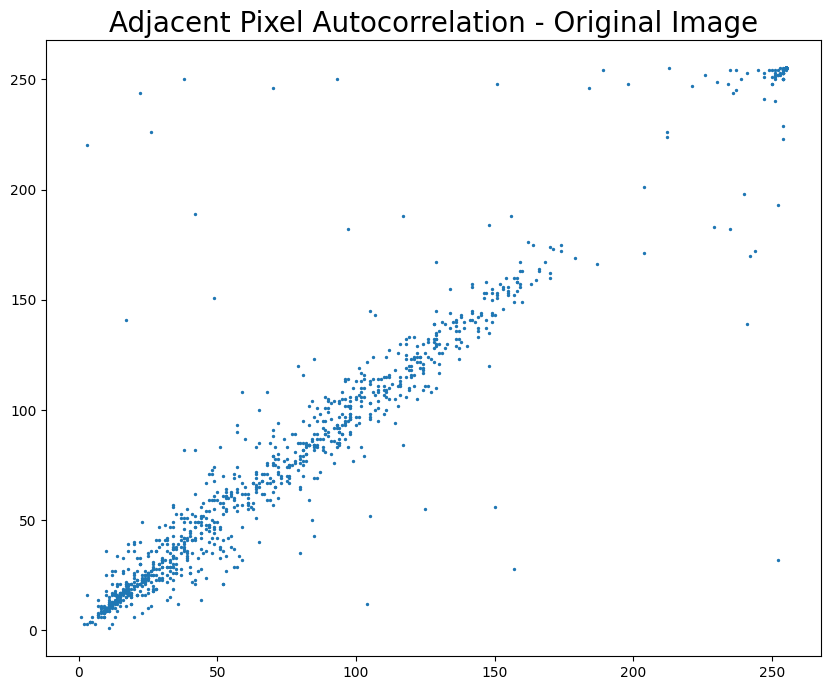

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250


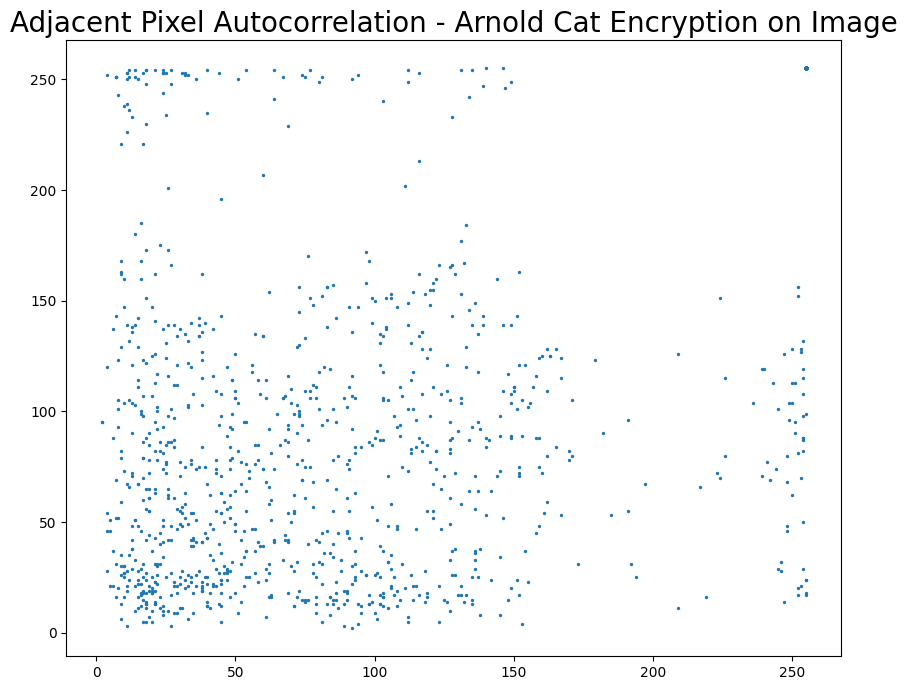

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Arnold Cat Encryption on Image', fontsize=20)
plt.show()

# Henon Map


Given initial conditions (x0,y0), a henon map is given by the following equations:
<br>

(Xn+1) = (Yn) + 1 − a.(Xn)

(Yn+1) = b * (Xn)

Classical Henon map have values of a = 1.4 and b = 0.3. For the classical values the Henon map is chaotic. For other values of a and b the map may be chaotic, intermittent, or converge to a periodic orbit.

In [ ]:
def dec(bitSequence):
    decimal = 0
    for bit in bitSequence:
        decimal = decimal * 2 + int(bit)
    return decimal

In [ ]:
def genHenonMap(dimension, key):
    x = key[0]
    y = key[1]
    sequenceSize = dimension * dimension * 8 #Total Number of bitSequence produced
    bitSequence = []    #Each bitSequence contains 8 bits
    byteArray = []      #Each byteArray contains m( i.e 512 in this case) bitSequence
    TImageMatrix = []   #Each TImageMatrix contains m*n byteArray( i.e 512 byteArray in this case)
    for i in range(sequenceSize):
        xN = y + 1 - 1.4 * x**2
        yN = 0.3 * x

        x = xN
        y = yN

        if xN <= 0.4:
            bit = 0
        else:
            bit = 1

        try:
            bitSequence.append(bit)
        except:
            bitSequence = [bit]

        if i % 8 == 7:
            decimal = dec(bitSequence)
            try:
                byteArray.append(decimal)
            except:
                byteArray = [decimal]
            bitSequence = []

        byteArraySize = dimension*8
        if i % byteArraySize == byteArraySize-1:
            try:
                TImageMatrix.append(byteArray)
            except:
                TImageMatrix = [byteArray]
            byteArray = []
    return TImageMatrix

## Henon Encryption


In [ ]:
def HenonEncryption(imageName,key):
    imageMatrix, dimension, color = getImageMatrix(imageName)
    transformationMatrix = genHenonMap(dimension, key)
    resultantMatrix = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            resultantMatrix.append(row)
        except:
            resultantMatrix = [row]
    if color:
      im = Image.new("RGB", (dimension, dimension))
    else:
      im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = resultantMatrix[x][y]
    im.save(imageName.split('.')[0] + "_HenonEnc.png", "PNG")

## Henon Decryption

In [ ]:
def HenonDecryption(imageNameEnc, key):
    imageMatrix, dimension, color = getImageMatrix(imageNameEnc)
    transformationMatrix = genHenonMap(dimension, key)
    pil_im = Image.open(imageNameEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            try:
                if color:
                    row.append(tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]))
                else:
                    row.append(transformationMatrix[i][j] ^ imageMatrix[i][j])
            except:
                if color:
                    row = [tuple([transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]])]
                else :
                    row = [transformationMatrix[i][j] ^ x for x in imageMatrix[i][j]]
        try:
            henonDecryptedImage.append(row)
        except:
            henonDecryptedImage = [row]
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageNameEnc.split('_')[0] + "_HenonDec.png", "PNG")

## Comparision

In [ ]:
image = "HorizonZero"
ext = ".png"
key = (0.1,0.1)

### Original Image

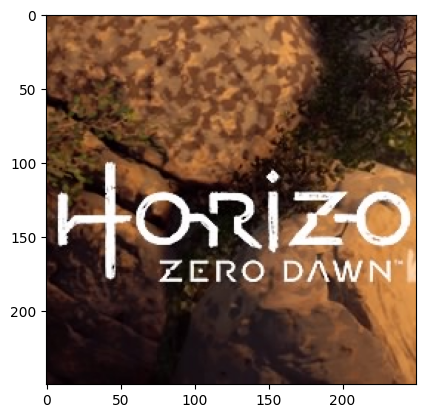

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

### Encryption

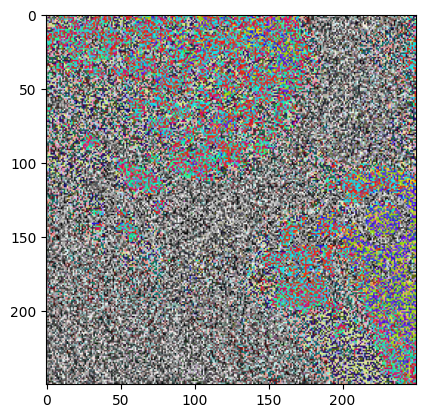

In [ ]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

### Decryption

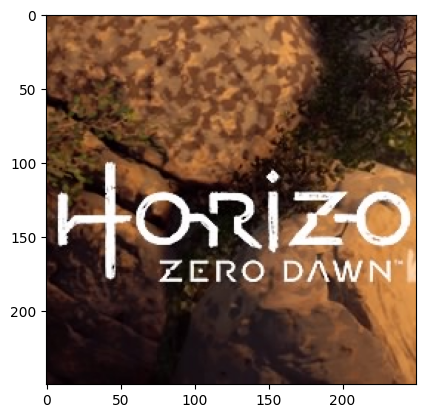

In [ ]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

In [ ]:
image = "lena"
ext = ".bmp"
key = (0.1, 0.1)

### Original Image

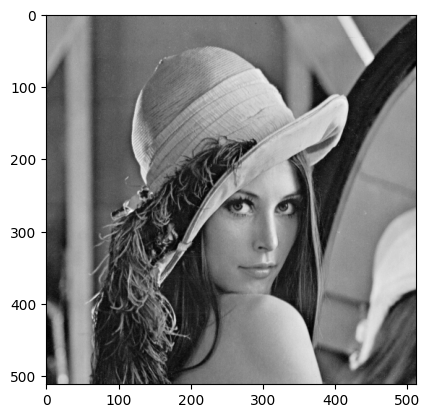

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encrypted Image

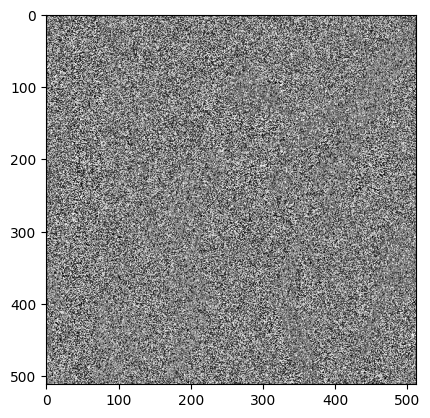

In [ ]:
HenonEncryption(image + ext, key)
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

### Decrypted Image

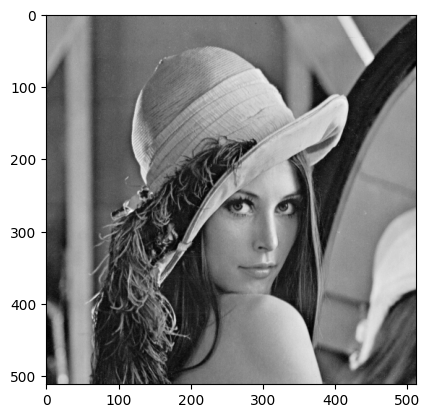

In [ ]:
HenonDecryption(image + "_HenonEnc.png", key)
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im), cmap='gray')

## Histogram


### Original Image

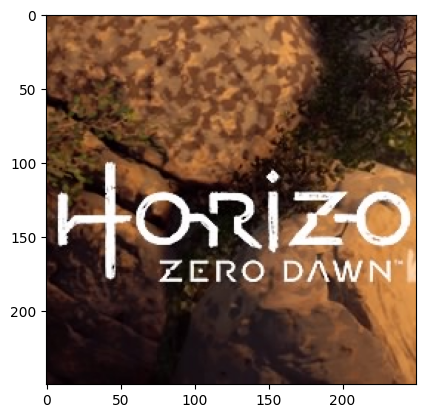

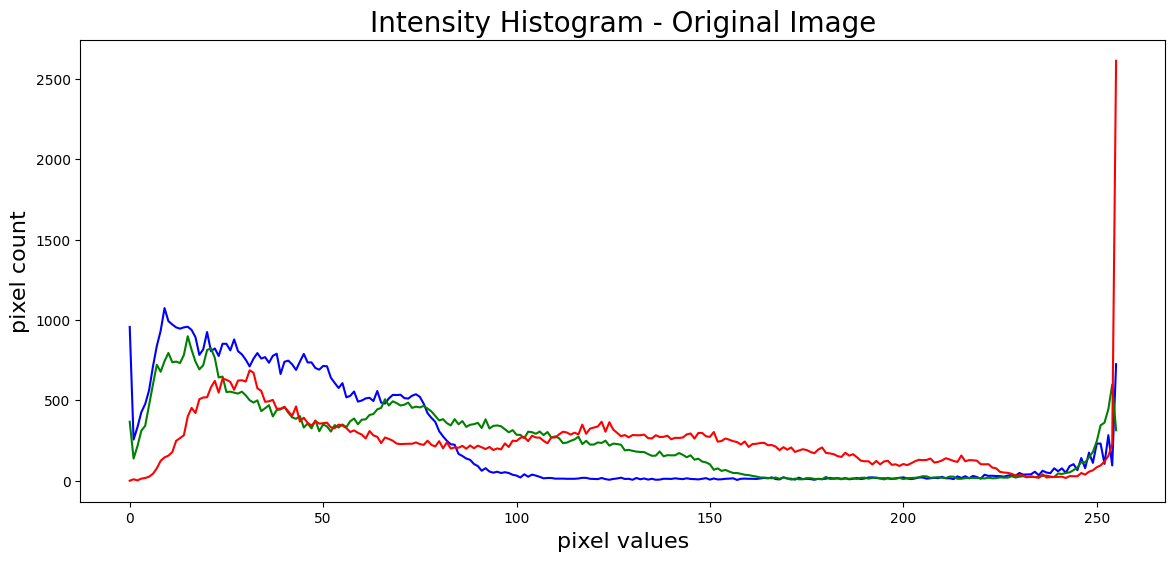

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

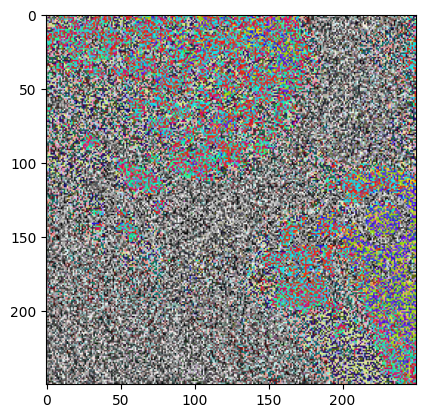

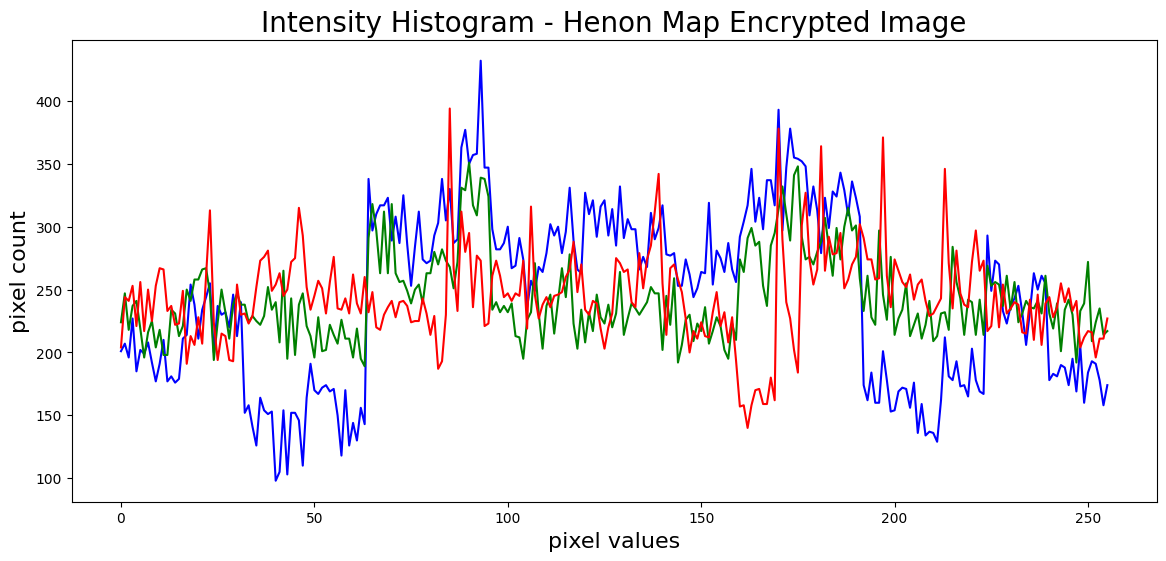

In [ ]:
image = "HorizonZero_HenonEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Henon Map Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel AutoCorrelation

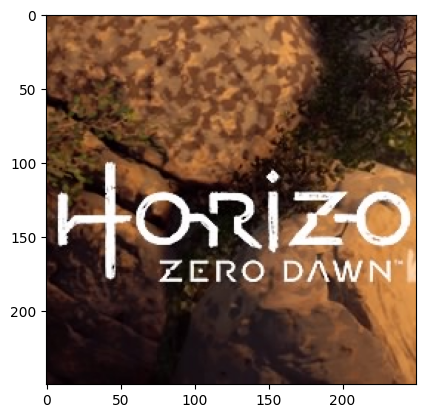

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

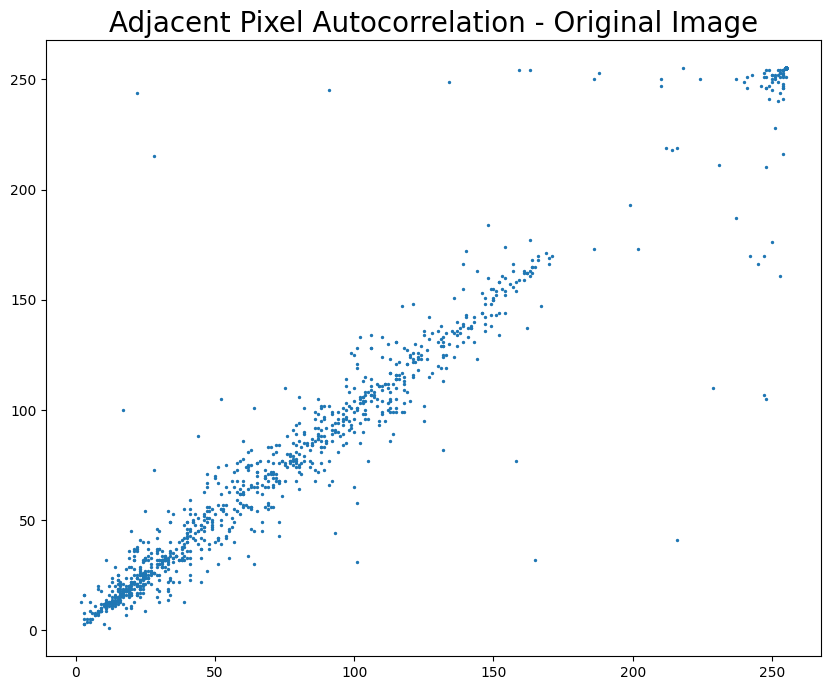

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

250


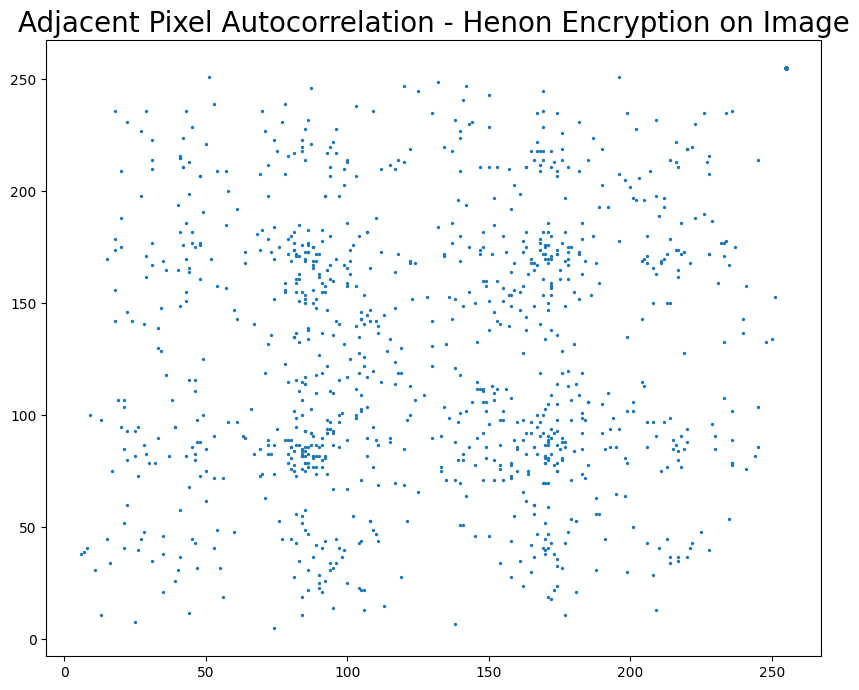

In [ ]:
image = "HorizonZero_HenonEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Henon Encryption on Image', fontsize=20)
plt.show()

# Logistic Chaos Maps with key mixing

**Logistic Map**

The logistic map is a specific type of chaotic map that is widely studied and utilized in various fields, including cryptography and image encryption. It is a nonlinear difference equation defined by the following recurrence relation:

```
x_(n+1) = r * x_n * (1 - x_n)
```

Where:
- `x_n` represents the value of the system at time `n`
- `r` is a parameter that controls the behavior of the system, typically ranging from 0 to 4

The logistic map exhibits chaotic behavior for certain values of `r`, specifically when `r` is between approximately 3.57 and 4. In this chaotic regime, the system displays sensitive dependence on initial conditions, meaning that even tiny differences in the starting value (`x_0`) can lead to vastly different outcomes over time.

<br>

**Properties of the Logistic Map:**

1. **Bounded and Non-Periodic**: The logistic map is confined to the interval between 0 and 1, and it does not exhibit strict periodicity, meaning that the sequence of values does not repeat itself in a fixed pattern.
2. **Pseudorandom Behavior**: Within the chaotic regime, the logistic map produces sequences that appear random and unpredictable, despite being deterministic.
3. **Ergodicity**: The logistic map explores the entire phase space (the interval between 0 and 1) over time, ensuring a thorough diffusion of the plaintext image across the ciphertext.
4. **Sensitive Dependence on Initial Conditions**: Small variations in the initial value (`x_0`) can lead to significantly different trajectories, providing a high level of unpredictability and making it difficult to deduce the original image or the encryption key.

<br>

**Logistic Map for Image Encryption:**

The logistic map's chaotic behavior, pseudorandom properties, and sensitivity to initial conditions make it a suitable candidate for image encryption algorithms. The encryption process typically involves the following steps:

1. **Key Generation**: The initial value (`x_0`) and the parameter `r` are used as the encryption key, which needs to be shared securely between the sender and the receiver.
2. **Iterating the Logistic Map**: The logistic map is iterated multiple times, starting from `x_0`, to generate a sequence of pseudorandom values.
3. **Diffusion and Confusion**: The pseudorandom sequence generated by the logistic map is used to perform diffusion and confusion operations on the plaintext image, scrambling the pixel values and their positions.
4. **Ciphertext Generation**: The diffused and confused image data is then further processed, often involving additional encryption techniques, to produce the final ciphertext.

The decryption process follows the reverse steps, using the shared encryption key (`x_0` and `r`) to regenerate the same pseudorandom sequence and then applying the inverse operations to recover the original plaintext image.

It is important to note that while the logistic map has been widely studied and utilized in image encryption algorithms, its security and robustness against various attacks should be carefully evaluated and compared to established encryption standards before deployment in critical applications.

In [ ]:
def LogisticEncryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]
    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y
    C = round((L*L_y*10**4) % 256)
    C_r = round((L*L_y*10**4) % 256)
    C_g = round((L*L_y*10**4) % 256)
    C_b = round((L*L_y*10**4) % 256)
    x = 4*(S_x)*(1-S_x)
    y = 4*(S_y)*(1-S_y)

    imageMatrix,dimension, color = getImageMatrix(imageName)
    LogisticEncryptionIm = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
              C_r =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][0]) % N) ^ ((C_r + key_list[7]) % N)
              C_g =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][1]) % N) ^ ((C_g + key_list[7]) % N)
              C_b =((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j][2]) % N) ^ ((C_b + key_list[7]) % N)
              row.append((C_r,C_g,C_b))
              C = C_r

            else:
              C = ((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((key_list[6]+imageMatrix[i][j]) % N) ^ ((C + key_list[7]) % N)
              row.append(C)

            x = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            y = (x + C/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        LogisticEncryptionIm.append(row)

    im = Image.new("L", (dimension, dimension))
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = LogisticEncryptionIm[x][y]
    im.save(imageName.split('.')[0] + "_LogisticEnc.png", "PNG")

In [ ]:
def LogisticDecryption(imageName, key):
    N = 256
    key_list = [ord(x) for x in key]

    G = [key_list[0:4] ,key_list[4:8], key_list[8:12]]
    g = []
    R = 1
    for i in range(1,4):
        s = 0
        for j in range(1,5):
            s += G[i-1][j-1] * (10**(-j))
        g.append(s)
        R = (R*s) % 1

    L_x = (R + key_list[12]/256) % 1
    S_x = round(((g[0]+g[1]+g[2])*(10**4) + L_x *(10**4)) % 256)
    V1 = sum(key_list)
    V2 = key_list[0]
    for i in range(1,13):
        V2 = V2 ^ key_list[i]
    V = V2/V1

    L_y = (V+key_list[12]/256) % 1
    S_y = round((V+V2+L_y*10**4) % 256)
    C1_0 = S_x
    C2_0 = S_y

    C = round((L_x*L_y*10**4) % 256)
    I_prev = C
    I_prev_r = C
    I_prev_g = C
    I_prev_b = C
    I = C
    I_r = C
    I_g = C
    I_b = C
    x_prev = 4*(S_x)*(1-S_x)
    y_prev = 4*(L_x)*(1-S_y)
    x = x_prev
    y = y_prev
    imageMatrix, dimension, color = getImageMatrix(imageName)

    henonDecryptedImage = []
    for i in range(dimension):
        row = []
        for j in range(dimension):
            while x <0.8 and x > 0.2 :
                x = 4*x*(1-x)
            while y <0.8 and y > 0.2 :
                y = 4*y*(1-y)
            x_round = round((x*(10**4))%256)
            y_round = round((y*(10**4))%256)
            C1 = x_round ^ ((key_list[0]+x_round) % N) ^ ((C1_0 + key_list[1])%N)
            C2 = x_round ^ ((key_list[2]+y_round) % N) ^ ((C2_0 + key_list[3])%N)
            if color:
                I_r = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_r + key_list[7]) % N) ^ imageMatrix[i][j][0]) + N-key_list[6])%N
                I_g = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_g + key_list[7]) % N) ^ imageMatrix[i][j][1]) + N-key_list[6])%N
                I_b = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev_b + key_list[7]) % N) ^ imageMatrix[i][j][2]) + N-key_list[6])%N
                I_prev_r = imageMatrix[i][j][0]
                I_prev_g = imageMatrix[i][j][1]
                I_prev_b = imageMatrix[i][j][2]
                row.append((I_r,I_g,I_b))
                x = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j][0]/256 + key_list[8]/256 + key_list[9]/256) % 1
            else:
                I = ((((key_list[4]+C1) % N) ^ ((key_list[5]+C2) % N) ^ ((I_prev+key_list[7]) % N) ^ imageMatrix[i][j]) + N-key_list[6])%N
                I_prev = imageMatrix[i][j]
                row.append(I)
                x = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
                y = (x +  imageMatrix[i][j]/256 + key_list[8]/256 + key_list[9]/256) % 1
            for ki in range(12):
                key_list[ki] = (key_list[ki] + key_list[12]) % 256
                key_list[12] = key_list[12] ^ key_list[ki]
        henonDecryptedImage.append(row)
    if color:
        im = Image.new("RGB", (dimension, dimension))
    else:
        im = Image.new("L", (dimension, dimension)) # L is for Black and white pixels
    pix = im.load()
    for x in range(dimension):
        for y in range(dimension):
            pix[x, y] = henonDecryptedImage[x][y]
    im.save(imageName.split('_')[0] + "_LogisticDec.png", "PNG")

### Original Image

In [ ]:
image = "lena"
ext = ".bmp"

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encryption

In [ ]:
LogisticEncryption("lena.bmp", "abcdefghijklm")
im = Image.open("lena_LogisticEnc.png", 'r')
imshow(np.asarray(im), cmap='gray')

### Decryption

In [ ]:
LogisticDecryption("lena_LogisticEnc.png","abcdefghijklm")
im = Image.open("lena_LogisticDec.png", 'r')
imshow(np.asarray(im),cmap='gray')

### Original Image

In [ ]:
image = "HorizonZero"
ext = ".png"
key = "abcdefghijklm"

In [ ]:
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im), cmap='gray')

### Encryption

In [ ]:
LogisticEncryption(image + ext, key)
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

### Decryption

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", key)
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

## Histogram Analysis

### Original Image

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

### Encrypted Image

In [ ]:
image = "HorizonZero_LogisticEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))
plt.figure(figsize=(14,6))

histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Logistic Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=16)
plt.ylabel('pixel count', fontsize=16)
plt.show()

## Adjacent Pixel Auto-Correlation

### Original Image

In [ ]:
image = "HorizonZero"
ext = ".png"
img = Image.open(image+ext).convert('LA')
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

### Encrypted Image

In [ ]:
image = "HorizonZero_LogisticEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Logistic Encryption on Image', fontsize=20)
plt.show()

# Key Sensitivity

An ideal image encryption algorithm should be sensitive with respect to thesecret key i.e a small change in the key should produce a completely differentencrypted image.To test the key sensitivity the we encrypt the plain image with the threealgorithms. We then try decrypting them with a slightly changed key.

### Original Image

In [ ]:
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

## Arnold Cat

Encrypt with key = 20

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, 20)
cv2_imshow(ArnoldCatEncryptionIm)

Decrypt with key = 19

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", 19)
cv2_imshow(ArnoldCatDecryptionIm)

## Henon Maps

Encrypt with key (0.1, 0.1)

In [ ]:
HenonEncryption(image + ext, (0.1, 0.1))
im = Image.open(image + "_HenonEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key (0.1, 0.101)

In [ ]:
HenonDecryption(image + "_HenonEnc.png", (0.1, 0.101))
im = Image.open(image + "_HenonDec.png", 'r')
imshow(np.asarray(im))

## Logistic Maps

Encrypt with the key "supersecretke"

In [ ]:
LogisticEncryption(image + ext, key = "supersecretke")
im = Image.open(image + "_LogisticEnc.png", 'r')
imshow(np.asarray(im))

Decrypt with the key "supersecretkd"

In [ ]:
LogisticDecryption(image + "_LogisticEnc.png", "supersecretkd")
im = Image.open(image + "_LogisticDec.png", 'r')
imshow(np.asarray(im))

# Conclusion

<b>Confusion Map:</b>

<b>Pros:</b>

1. **Simplicity**: The Confusion Map is a relatively simple chaotic map, making it computationally efficient and suitable for real-time applications or resource-constrained environments.

2. **Unpredictability**: The map exhibits chaotic behavior and is sensitive to initial conditions, providing a high level of unpredictability in the encrypted data.

3. **Diffusion Properties**: The Confusion Map can effectively diffuse the plaintext data across the ciphertext, making it more difficult for an attacker to deduce the original data or encryption key.

<b>Cons:</b>

1. **Limited Key Space**: The Confusion Map has a relatively small key space compared to other chaotic maps or traditional encryption algorithms, potentially making it more susceptible to brute-force attacks.

2. **Periodicity**: The map can exhibit periodic behavior for certain parameter values, which may introduce vulnerabilities if not properly addressed.

3. **Lack of Comprehensive Analysis**: The Confusion Map has not been as extensively studied and analyzed as other chaotic maps in the context of cryptography, and its security properties may not be as well-understood.

<b>Logistic Map:</b>

<b>Pros:</b>

1. **Well-Studied and Analyzed**: The Logistic Map is one of the most widely studied and analyzed chaotic maps, with a rich body of research and analysis on its properties and behaviors.

2. **Ergodicity**: The Logistic Map exhibits ergodic behavior, ensuring that the entire phase space is explored over time, leading to thorough diffusion of the plaintext data.

3. **Pseudorandom Properties**: The map can generate sequences that appear random and unpredictable, making it suitable for encryption applications.

<b>Cons:</b>

1. **Limited Key Space**: Similar to the Confusion Map, the Logistic Map has a relatively small key space, which may be a concern in certain cryptographic applications.

2. **Potential Performance Issues**: Depending on the implementation and the size of the data being encrypted, the Logistic Map may require more computational resources compared to other chaotic maps or traditional encryption algorithms.

3. **Potential Vulnerabilities**: While extensively studied, the Logistic Map may still be susceptible to certain attacks or vulnerabilities if not implemented carefully.


